In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.13 |Continuum Analytics, Inc.| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
Numpy: 1.14.0
matplotlib: 2.1.0
pandas: 0.21.0
sklearn: 0.19.1


In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

C:\Programdata\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [9]:
# Preprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

# Print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index([u'id', u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'signle_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'class'],
      dtype='object')]
(699, 10)


In [13]:
# Do dataset visualizations
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
signle_epithelial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000        

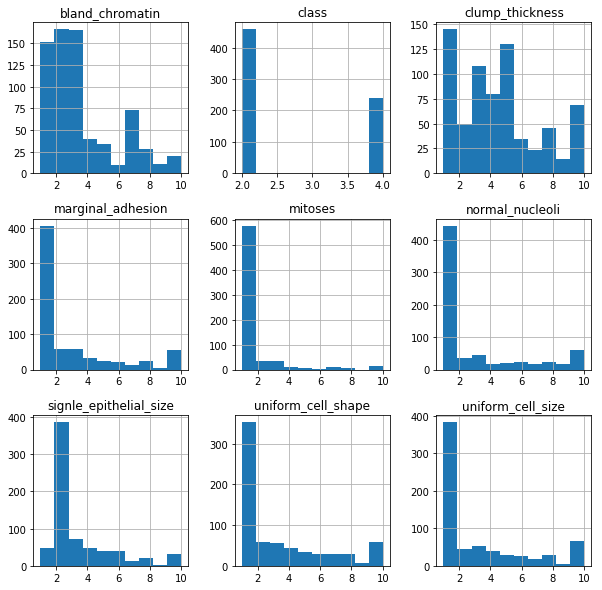

In [14]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

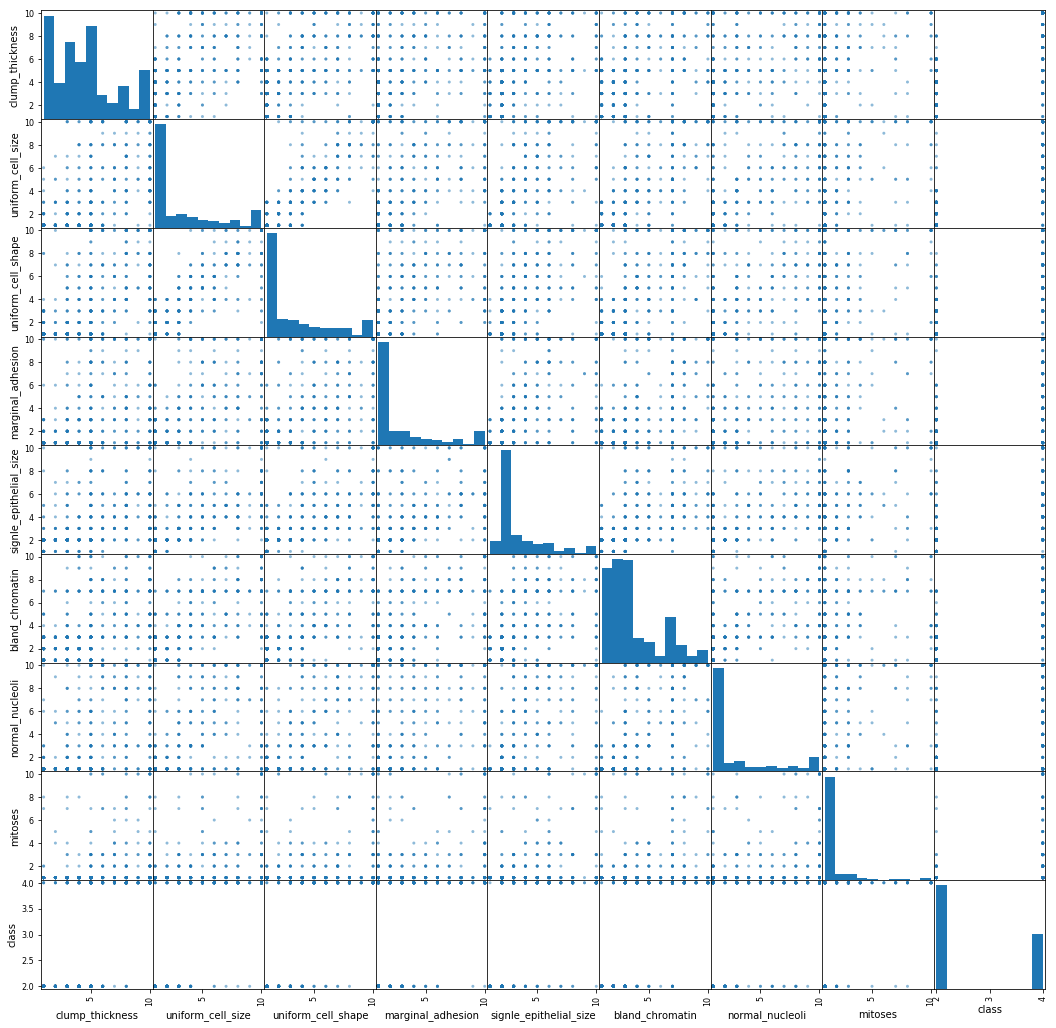

In [15]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18, 18))
plt.show()

In [24]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [25]:
# Specify testing options
seed = 8 
scoring = 'accuracy'

In [26]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.973149 (0.018331)
SVM: 0.953474 (0.024253)


In [27]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
             precision    recall  f1-score   support

          2       0.97      0.99      0.98        84
          4       0.98      0.95      0.96        56

avg / total       0.97      0.97      0.97       140

SVM
0.9642857142857143
             precision    recall  f1-score   support

          2       1.00      0.94      0.97        84
          4       0.92      1.00      0.96        56

avg / total       0.97      0.96      0.96       140



In [34]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,4]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9642857142857143
[2]
